In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [2]:
# Loading the Dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [3]:
##   :Attribute Information:
##       - age     age in years
##       - sex
##       - bmi     body mass index
##       - bp      average blood pressure
##       - s1      tc, total serum cholesterol
##       - s2      ldl, low-density lipoproteins
##       - s3      hdl, high-density lipoproteins
##       - s4      tch, total cholesterol / HDL
##       - s5      ltg, possibly log of serum triglycerides level
##       - s6      glu, blood sugar level

In [4]:
# Changing format to float
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Basic statistics
data_description = data.describe()
data_description = data_description.transpose()
print(data_description)

           count      mean      std      min      25%       50%       75%  \
age    442.00000  -0.00000  0.04762 -0.10723 -0.03730   0.00538   0.03808   
sex    442.00000   0.00000  0.04762 -0.04464 -0.04464  -0.04464   0.05068   
bmi    442.00000  -0.00000  0.04762 -0.09028 -0.03423  -0.00728   0.03125   
bp     442.00000  -0.00000  0.04762 -0.11240 -0.03666  -0.00567   0.03564   
s1     442.00000  -0.00000  0.04762 -0.12678 -0.03425  -0.00432   0.02836   
s2     442.00000   0.00000  0.04762 -0.11561 -0.03036  -0.00382   0.02984   
s3     442.00000  -0.00000  0.04762 -0.10231 -0.03512  -0.00658   0.02931   
s4     442.00000  -0.00000  0.04762 -0.07639 -0.03949  -0.00259   0.03431   
s5     442.00000   0.00000  0.04762 -0.12610 -0.03325  -0.00195   0.03243   
s6     442.00000   0.00000  0.04762 -0.13777 -0.03318  -0.00108   0.02792   
target 442.00000 152.13348 77.09300 25.00000 87.00000 140.50000 211.50000   

             max  
age      0.11073  
sex      0.05068  
bmi      0.17056  

In [5]:
# Data Head
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.00000
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.00000
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.00000
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.00000
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.00000


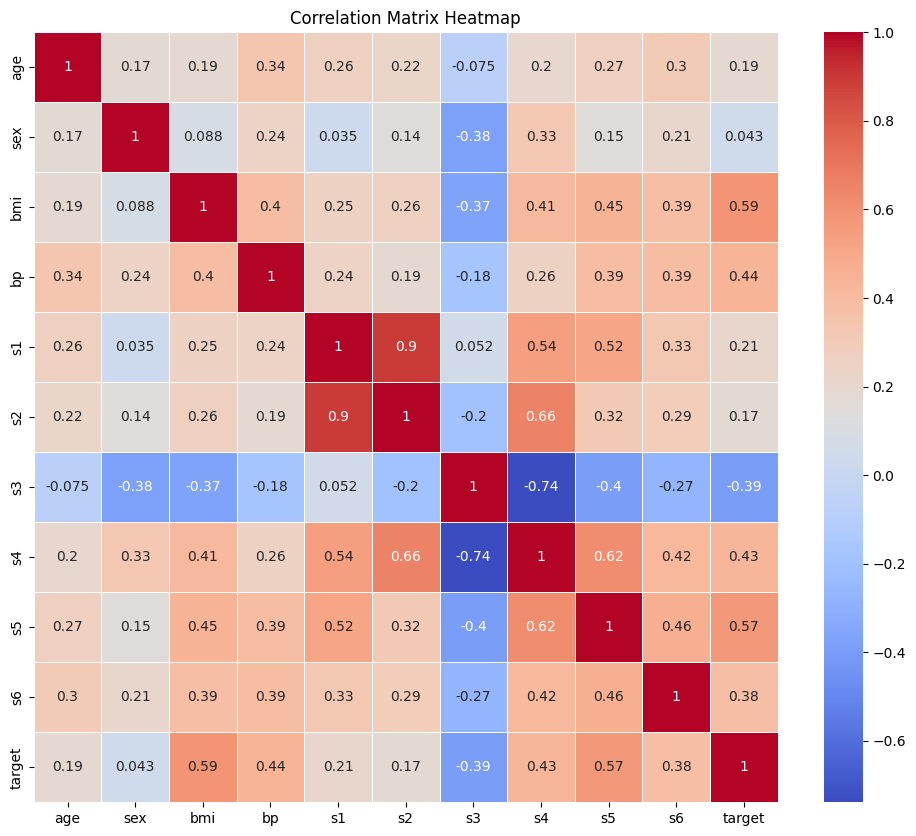

In [6]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

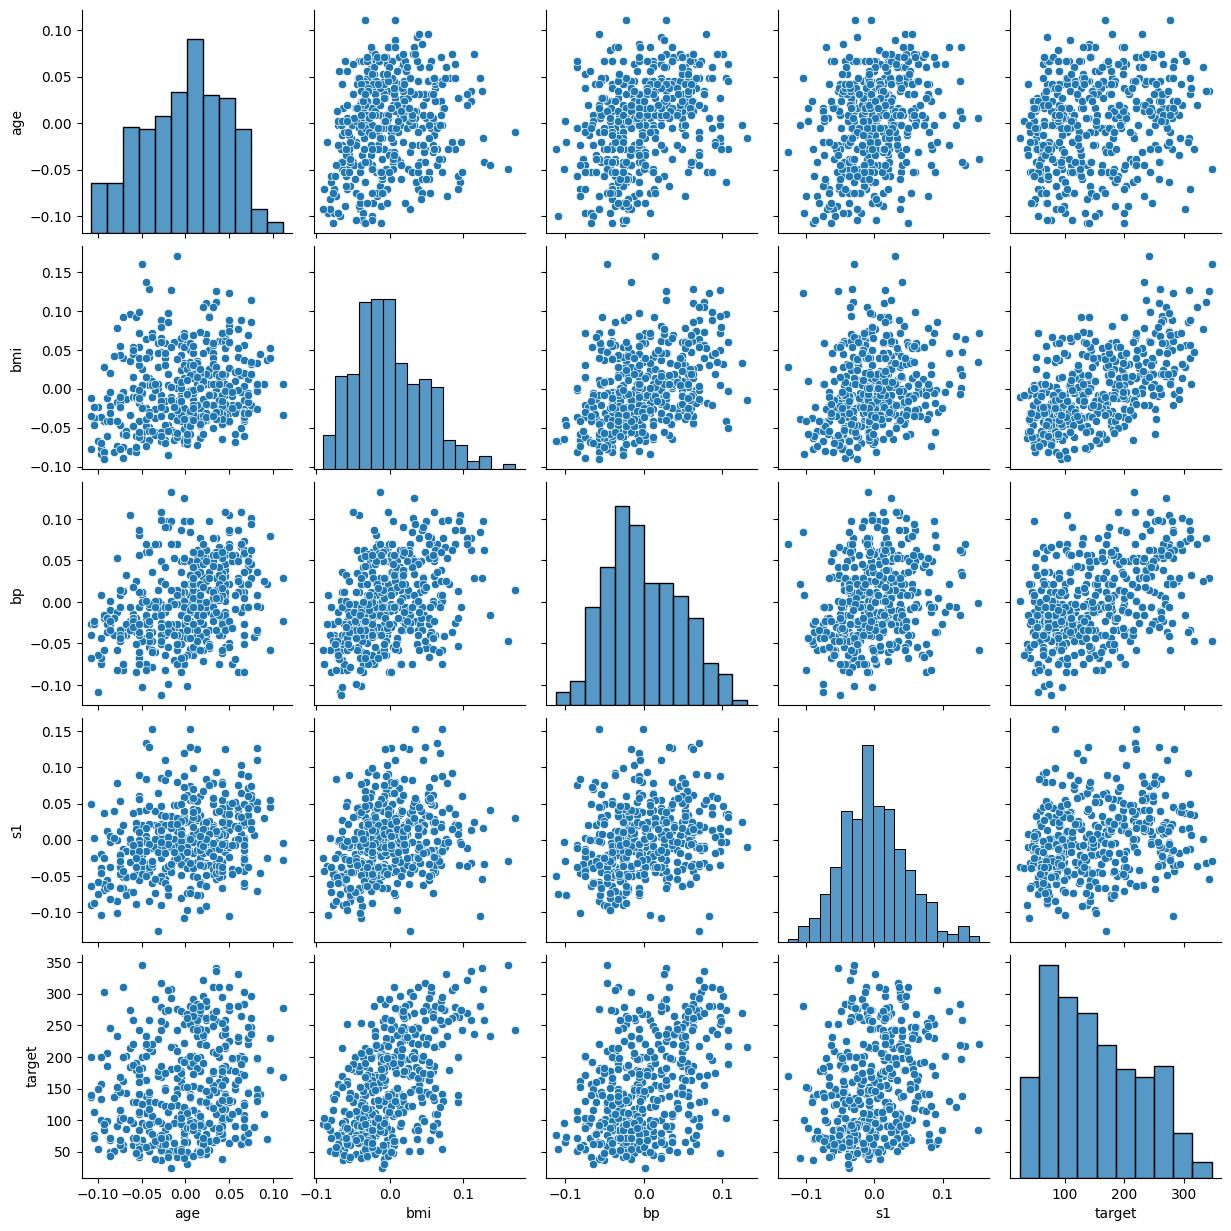

In [7]:
 # Pairplot for selected features
selected_features = ['age', 'bmi', 'bp', 's1', 'target']
sns.pairplot(data[selected_features])
plt.show()

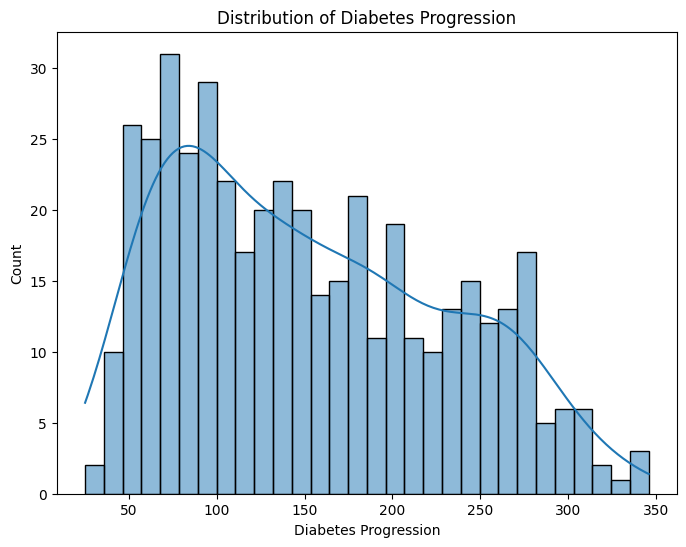

In [8]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], bins=30, kde=True)
plt.xlabel('Diabetes Progression')
plt.title('Distribution of Diabetes Progression')
plt.show()

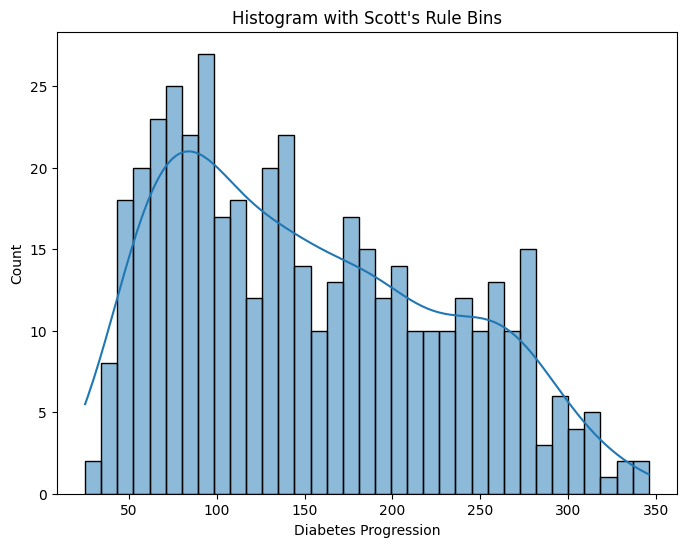

In [9]:
scotts_bins = int((3.5 * np.std(data['target'])) / (len(data['target'])**(1/3)))

# Visualization with Scott's Bins
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], bins=scotts_bins, kde=True)
plt.xlabel('Diabetes Progression')
plt.title('Histogram with Scott\'s Rule Bins')
plt.show()

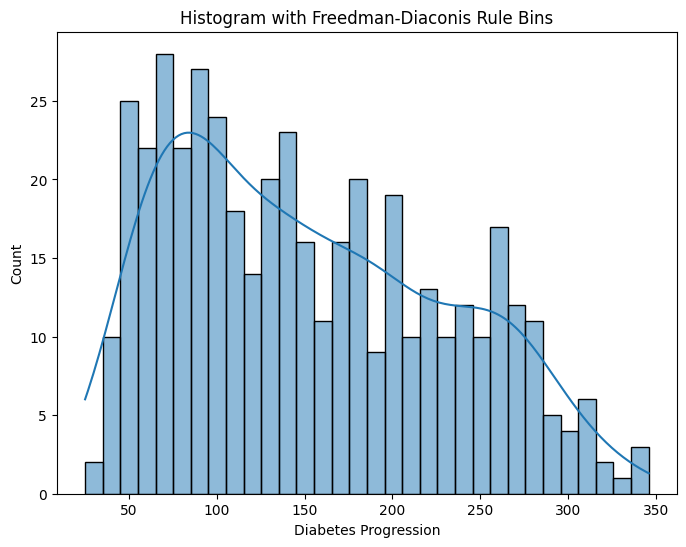

In [10]:
iqr = np.percentile(data['target'], 75) - np.percentile(data['target'], 25)
freedman_bins = int((2 * iqr) / (len(data['target'])**(1/3)))

# Visualization with Freedman-Diaconis Bins
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], bins=freedman_bins, kde=True)
plt.xlabel('Diabetes Progression')
plt.title('Histogram with Freedman-Diaconis Rule Bins')
plt.show()

In [11]:
# Split data into training and testing sets in 80:20 ratio
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Model evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Root Mean Squared Error: 53.85
R-squared: 0.45


In [14]:
model = LinearRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

rmse_cv = np.sqrt(-cv_scores)

print("Cross Validation RMSE:", rmse_cv)
print("Mean RMSE:", rmse_cv.mean())

Cross Validation RMSE: [53.85344584 51.60075202 57.55263581 52.89502389 58.34284697]
Mean RMSE: 54.84894090589967


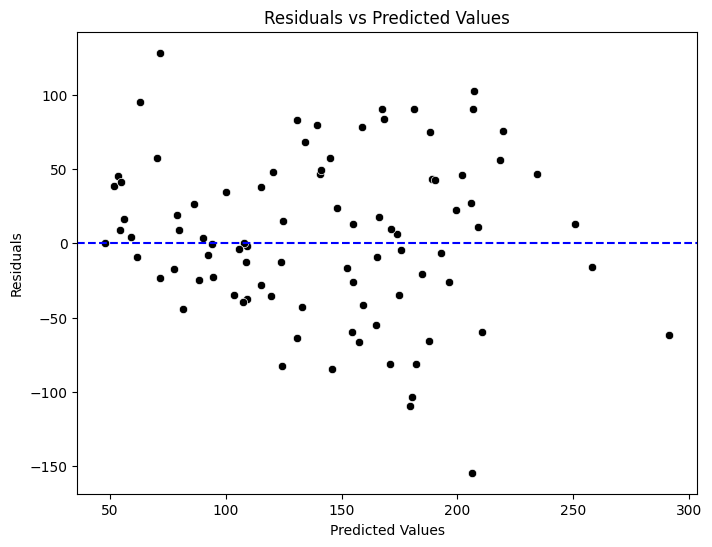

In [15]:
# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='black')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

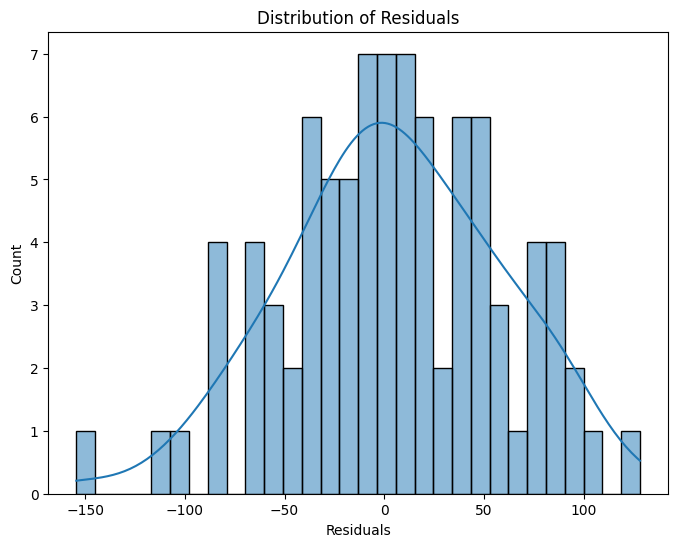

In [16]:
# Normality of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

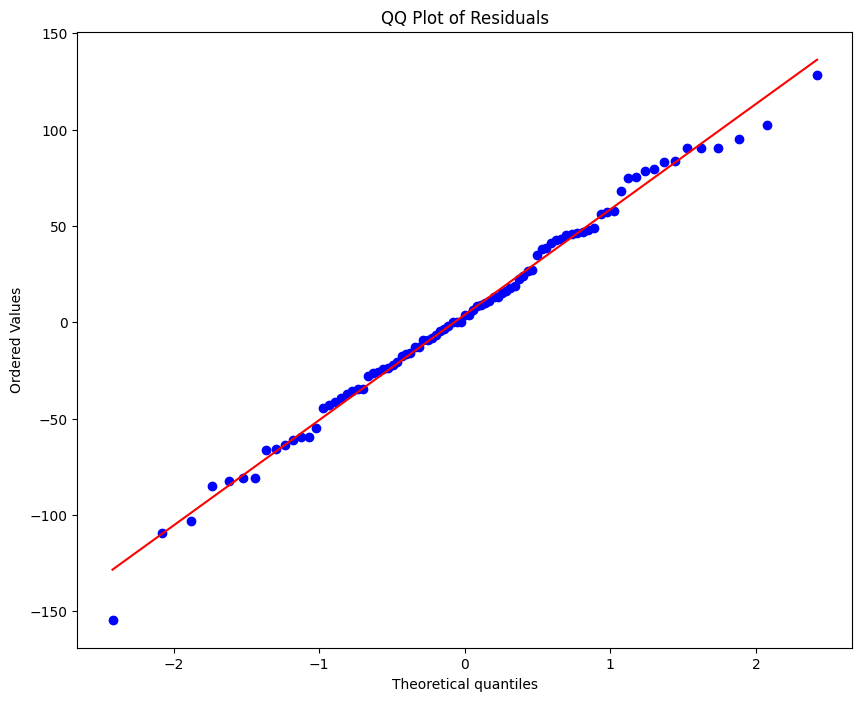

In [17]:
# QQ Plot to check for normality
plt.figure(figsize=(10, 8))
stats.probplot(residuals, plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

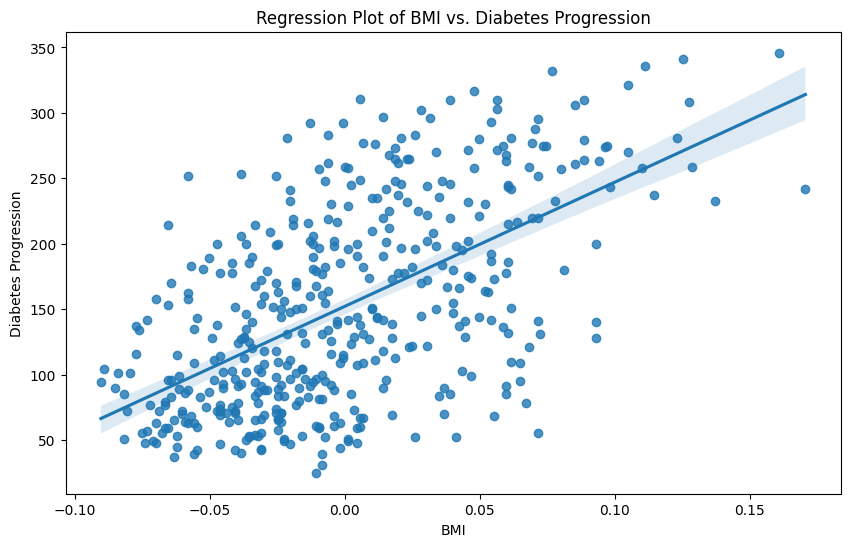

In [18]:
# Regression plot for a selected feature
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='target', data=data)

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Regression Plot of BMI vs. Diabetes Progression')

plt.show()